In [2]:
from scipy import signal
import skimage.io
import skimage
import tifffile
# mode='same' is there to enforce the same output shape as input arrays
# (ie avoid border effects)
kernel = tifffile.tifffile.imread("C:/Users/charl/Downloads/Drosophila/PSF BWz=100nm.tif")

In [10]:
kernel.shape

(50, 100, 100)

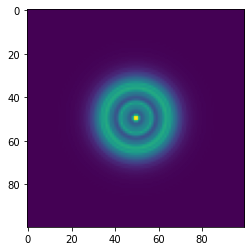

In [11]:
import matplotlib.pyplot as plt
plt.imshow(kernel[0])

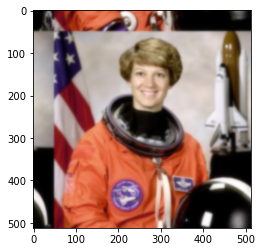

In [55]:
import numpy as np
import numpy as np
from scipy import fftpack
import matplotlib.pyplot as plt

img = skimage.data.astronaut() / 255

kernel_ft = fftpack.fft2(kernel[20]/np.max(kernel[20]), shape=img.shape[:2], axes=(0, 1))
img_ft = fftpack.fft2(img, axes=(0, 1))
# the 'newaxis' is to match to color direction
img2_ft = kernel_ft[:, :, np.newaxis] * img_ft
img2 = fftpack.ifft2(img2_ft, axes=(0, 1)).real

# clip values to range
# img2 = np.clip(img2, 0, 1)
img2 = img2 / np.max(img2)

plt.figure()
plt.imshow(img2)

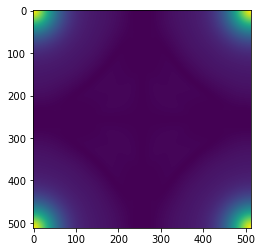

In [54]:
plt.imshow(np.abs(kernel_ft))

In [28]:
kernel[]

array([[4.8610605e-07, 2.6122157e-06, 2.1552514e-06, ..., 2.1552514e-06,
        2.6122157e-06, 4.8610605e-07],
       [2.6122157e-06, 2.1047599e-06, 5.2214193e-07, ..., 5.2214193e-07,
        2.1047599e-06, 2.6122157e-06],
       [2.1552514e-06, 5.2214193e-07, 3.3801994e-06, ..., 3.3801994e-06,
        5.2214193e-07, 2.1552514e-06],
       ...,
       [2.1552514e-06, 5.2214193e-07, 3.3801994e-06, ..., 3.3801994e-06,
        5.2214193e-07, 2.1552514e-06],
       [2.6122157e-06, 2.1047599e-06, 5.2214193e-07, ..., 5.2214193e-07,
        2.1047599e-06, 2.6122157e-06],
       [4.8610605e-07, 2.6122157e-06, 2.1552514e-06, ..., 2.1552514e-06,
        2.6122157e-06, 4.8610605e-07]], dtype=float32)

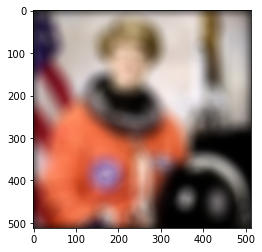

In [72]:
kernel2 = kernel[0]
img3 = signal.fftconvolve(img, kernel2[:, :, np.newaxis], mode='same')

img4 = img3 / np.max(img3)
plt.imshow(img4)

## DIV2K

In [98]:
from scipy import signal
import skimage.io
import skimage.transform
import skimage
import tifffile
import glob
import os

kernel = tifffile.tifffile.imread("C:/Users/charl/Downloads/Drosophila/PSF BWz=100nm.tif")

imgs = glob.glob('G:/My Drive/01datasets/0standard/DIV2K/DIV2K_train_LR_bicubic/X4/*.png')
directory = 'C:/temp/DIV2K_3D_convolution_20200914'

os.makedirs(directory,exist_ok=True)

for iidx,imgfile in enumerate(imgs):
    img = skimage.io.imread(imgfile)
    img = skimage.transform.resize(img, (512,512),order=3)
    img = np.mean(img,axis=2)
    
    zstack = []
    for kidx,kernelslice in enumerate(kernel):
        img3 = signal.fftconvolve(img, kernelslice, mode='same')
        zstack.append(img3)
        print('[%d,%d]' % (iidx,kidx),end='\r')
    
    zstack = np.array(zstack)
    zstack = (zstack - np.min(zstack)) / (np.max(zstack) - np.min(zstack))
    zstack = list(zstack)
    zstack.append(img)
    zstack = np.array(zstack)
    zstack = (255*zstack).astype('uint8')
    skimage.io.imsave('%s/%s.tif' % (directory,os.path.basename(imgfile).split('.')[0] ),zstack)

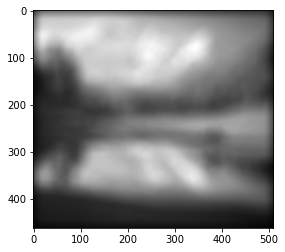

In [87]:
zstack = np.array(zstack)
plt.imshow(zstack[0],cmap='gray')

# Actual 3D convolution

In [29]:
from scipy import signal
import skimage.io
import skimage.transform
import skimage
import tifffile
import glob
import os
import numpy as np

kernel = tifffile.tifffile.imread("C:/Users/charl/Downloads/Drosophila/PSF BWz=100nm.tif")

imgs = glob.glob('G:/My Drive/01datasets/0standard/DIV2K/DIV2K_train_LR_bicubic/X4/*.png')
directory = 'C:/temp/DIV2K_3D_convolution_20200916'

imglist = []

for iidx,imgfile in enumerate(imgs):
    img = skimage.io.imread(imgfile)
    img = skimage.transform.resize(img, (256,256),order=3)
    img = np.mean(img,axis=2)
    imglist.append(img.copy())
    print('%d/%d' % (iidx,len(imgs)),end='\r')

In [30]:
np.array(imglist[0:2]).shape

(2, 256, 256)

In [31]:
os.makedirs(directory,exist_ok=True)

for idx in range(len(imglist)-50):
    
    zstack = np.array(imglist[idx:idx+50])
    zstack = signal.fftconvolve(zstack, kernel, mode='same')
    zstack = (zstack - np.min(zstack)) / (np.max(zstack) - np.min(zstack))
    zstack = list(zstack)
    zstack.extend(np.array(imglist[idx:idx+50]))
    zstack = np.array(zstack)
    zstack = (255*zstack).astype('uint8')
    skimage.io.imsave('%s/%04d.tif' % (directory,idx ),zstack)

# 3D convolution with variable z-dependency

### By skipping an indices

In [1]:
from scipy import signal
import skimage.io
import skimage.transform
import skimage
import tifffile
import glob
import os
import numpy as np

kernel = tifffile.tifffile.imread("C:/Users/charl/Downloads/Drosophila/PSF BWz=100nm.tif")

imgs = glob.glob('G:/My Drive/01datasets/0standard/DIV2K/DIV2K_train_LR_bicubic/X4/*.png')


imglist = []

for iidx,imgfile in enumerate(imgs):
    img = skimage.io.imread(imgfile)
    img = skimage.transform.resize(img, (256,256),order=3)
    img = np.mean(img,axis=2)
    imglist.append(img.copy())
    print('%d/%d' % (iidx,len(imgs)),end='\r')

In [4]:
np.array(imglist[0:2]).shape

(2, 256, 256)

In [7]:
directory = 'C:/temp/DIV2K_3D_convolution_20201003'
os.makedirs(directory,exist_ok=True)

for idx in range(len(imglist)-50):
    
    zstack = np.array(imglist[idx:idx+50])
    zstack = signal.fftconvolve(zstack, kernel[24:26,:,:], mode='same')
    zstack = (zstack - np.min(zstack)) / (np.max(zstack) - np.min(zstack))
    zstack = list(zstack)
    zstack.extend(np.array(imglist[idx:idx+50]))
    zstack = np.array(zstack)
    zstack = (255*zstack).astype('uint8')
    skimage.io.imsave('%s/%04d.tif' % (directory,idx ),zstack)

In [355]:
zstack.shape

(100, 256, 256)

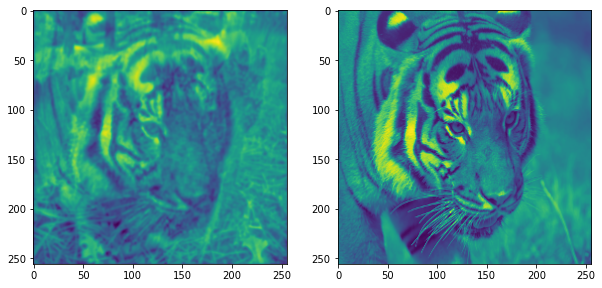

In [356]:
import matplotlib.pyplot as plt
pidx = 10

plt.figure(figsize=(10,5))
plt.subplot(121)
plt.imshow(zstack[pidx])
plt.subplot(122)
plt.imshow(zstack[-50+pidx])
plt.show()

### By interpolation

In [56]:
kernel.shape

(50, 100, 100)

In [288]:
from scipy.interpolate import RegularGridInterpolator
from numpy import linspace, zeros, array

lateral_pixelsize_ratio = 0.2
pixelsize_ratio = 1/5 # fraction of PSF pixelsize and input image

xorig = linspace(-1,1,50)
yorig = linspace(-1,1,100)
zorig = linspace(-1,1,100)
V = kernel

fn = RegularGridInterpolator((xorig,yorig,zorig), V)

x = linspace(-1,1,int(pixelsize_ratio*50))
y = linspace(-1,1,int(lateral_pixelsize_ratio*100))
z = linspace(-1,1,int(lateral_pixelsize_ratio*100))
interpV = np.zeros((len(x),len(y),len(z)))
count = 0
maxcount = len(x)*len(y)*len(z)

for ix in range(len(x)):
    for iy in range(len(y)):
        for iz in range(len(z)):
            _x,_y,_z = x[ix],y[iy],z[iz]
            interpV[ix,iy,iz] = fn(array([_x,_y,_z]))
            
            if count % 10:
                print('%0.5f' % (count / maxcount),end='\r')
            count += 1

In [289]:
interpV.shape

(10, 20, 20)

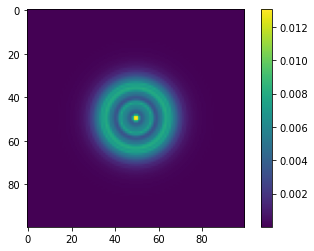

In [290]:
plt.imshow(kernel[0])
plt.colorbar()

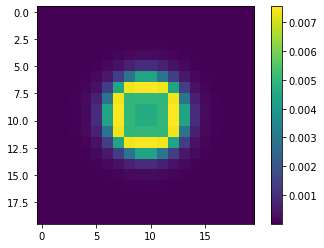

In [291]:
plt.imshow(interpV[0])
plt.colorbar()

### testing the kernel

In [306]:
os.makedirs(directory,exist_ok=True)

for idx in range(len(imglist)-50):
    
    zstack = np.array(imglist[idx:idx+50])
    zstack = signal.fftconvolve(zstack, interpV**5, mode='same')
    zstack = (zstack - np.min(zstack)) / (np.max(zstack) - np.min(zstack))
    zstack = list(zstack)
    zstack.extend(np.array(imglist[idx:idx+50]))
    zstack = np.array(zstack)
    zstack = (255*zstack).astype('uint8')
#     skimage.io.imsave('%s/%04d.tif' % (directory,idx ),zstack)
    break

In [307]:
zstack.shape

(100, 256, 256)

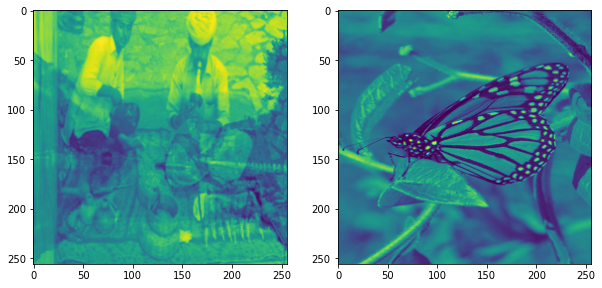

In [308]:
import matplotlib.pyplot as plt
pidx = 5

plt.figure(figsize=(10,5))
plt.subplot(121)
plt.imshow(zstack[pidx])
plt.subplot(122)
plt.imshow(zstack[-50+pidx])
plt.show()